# Lab 2: Data Manipulation and Web Services

# Challenge No 1:

In this challenge, we create a dataframe with 1OO rows and 4 columns using a dictionary. Next, manipulate the resulting dataframe in following ways:

- create a new dataframe by filtering the first 30 rows and first 3 columns, we save this new dataframe as subset_df,
- filter rows of the original dataframe by a numerical attribute and a categorical attribute and save the resulting dataframe as filtered_df,
- calculate basic summary statitics using methods mean() and std(), and use groupby()

In [20]:
import numpy as np
import pandas as pd

# Create a dataframe: initialize columns
years1 = range (1924,2024)
a = np.repeat(years1, 1)
b = np.random.randint(0, 1000, 100)
c = np.random.randint(0, 3, 100)
d = np.random.randint(0, 10, 100)

# Combine the columns into a dataframe using a dictionary
df = pd.DataFrame({'a':a,'b':b,'c':c,'d':d})
df.head

<bound method NDFrame.head of        a    b  c  d
0   1924  870  0  2
1   1925  893  2  2
2   1926  615  1  4
3   1927  476  1  4
4   1928  604  2  2
..   ...  ... .. ..
95  2019  424  2  3
96  2020  855  1  1
97  2021  903  2  5
98  2022  597  0  1
99  2023  989  0  3

[100 rows x 4 columns]>

In [8]:
# Subset first 30 rows and 3 columns of the original dataframe
subset_df = df.iloc[:30, :3]

In [34]:
# Covert column c into a categorical variable
df['c'] = df['c'].astype('category')
df.dtypes

a       int64
b       int64
c    category
d       int64
dtype: object

In [36]:
# Filter original dataframe by a numerical and categorical attribute
filtered_df = df[df.iloc[:,1] >= 5]
filtered_df = filtered_df[filtered_df.iloc[:,2] == 2]
filtered_df.head()

a    b  c  d
1  1925  893  2  2
4  1928  604  2  2
6  1930  448  2  7
8  1932  935  2  7
9  1933  164  2  3

In [40]:
# Calculate summary statistics of numerical columns
df[['a', 'b', 'd']].mean()
df[['a', 'b', 'd']].sum()
df[['a', 'b', 'd']].std()

# Use the method groupby
grouped_df = df.groupby('c')

/var/folders/_v/0ysnzh811hj_hnrpjkv8j6fw0000gn/T/ipykernel_54096/594596572.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby('c')


## Challenge 2

### Part 1

In the first part of Challenge 2, we calculate the clustered areas for end locations of rented bicycles. To do so, we follow a similar workflow as in the provided notebook. 

The workflow can be summarized in following steps:
1. Obtain the data
   - we use the Glasgow Open Data API to obtain the data,
   - transform the data into json format such that it is then convertible into a pandas dataframe.
     
2. Clean the data
   - check and drop missing values in columns containing coordinates,
   - using location data on end locations convert into a Geopandas dataframe,
   - check and change the coordinate system,
   - change for relevant columns and change datatypes if necessary
     
3. Perform clustering
   - perform clustering using the scikitlearn library,
   - visualize it.
     

### 2.1.1 Obtain the data using web services

In [42]:
import requests
import pandas as pd
import geopandas as gpd

# Use the URL obtained from Glasgow Open Data API
url_bikes = "https://api.glasgow.gov.uk/mobility/v1/get_rentals?startDate=2022-05-01&endDate=2023-05-01"

response = requests.get(url_bikes)
response

<Response [200]>

In [43]:
# Translate the web server response into json format
data = response.json()

In [44]:
# Extract data
rental_data = data['data']

In [45]:
# Convert into a Pandas dataframe
rental_pd = pd.DataFrame(rental_data)
rental_pd.head()

created                   updated cityId  bikeId  \
0  2022-10-21T13:09:57.926Z  2022-10-21T13:09:57.926Z    237  116870   
1  2022-10-21T13:09:57.975Z  2022-10-21T13:09:57.975Z    237  143384   
2  2022-10-21T13:09:58.026Z  2022-10-21T13:09:58.026Z    237  129744   
3  2022-10-21T13:09:58.076Z  2022-10-21T13:09:58.076Z    237  143168   
4  2022-10-21T13:09:58.126Z  2022-10-21T13:09:58.126Z    237  143248   

              startDate startPlaceId startPlaceCityId  \
0  2022-05-01T00:01:40Z       264299              237   
1  2022-05-01T00:04:17Z     28521547              237   
2  2022-05-01T00:04:24Z       266171              237   
3  2022-05-01T00:04:29Z       349455              237   
4  2022-05-01T00:04:40Z       349455              237   

                            startPlaceName  startPlaceStationNumber  \
0                    ELECTRIC - Broomielaw                   8413.0   
1                        King Street South                   8230.0   
2  University of Glasgow (East) - ELECTRIC                   8435.0   
3       ELECTRIC - Cessnock Subway Station                   8444.0   
4       ELECTRIC - Cessnock Subway Station                   8444.0   

   startPlaceLat  ...  endPlaceCityId endChannelId  \
0      55.856600  ...             237          381   
1      55.855860  ...             237          381   
2      55.871763  ...             237          381   
3      55.851918  ...             237          381   
4      55.851918  ...             237          381   

                                        endPlaceName endPlaceStationNumber  \
0                              ELECTRIC - Broomielaw                8413.0   
1  Alexandra Park (south entrance) Alexandra Para...                8457.0   
2                         Botanic Gardens - ELECTRIC                8417.0   
3                 ELECTRIC - Cessnock Subway Station                8444.0   
4                         ELECTRIC - St Enoch Square                8410.0   

  endPlaceLat endPlaceLong durationSeconds  isInvalid  price  isEbike  
0   55.856600    -4.263521              56      False    2.0     True  
1   55.863128    -4.210282            1097      False    1.0    False  
2   55.878278    -4.288487             344      False    1.0    False  
3   55.851918    -4.294490           10400      False    6.0    False  
4   55.856829    -4.255292            4611      False    3.0    False  

[5 rows x 24 columns]

In [46]:
# Drop observations with missing data on location 
clean_rental_pd = rental_pd.dropna(subset=['startPlaceLat', 'startPlaceLong', 'endPlaceLat','endPlaceLong'])
clean_rental_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9940 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   created                  9940 non-null   object 
 1   updated                  9940 non-null   object 
 2   cityId                   9940 non-null   object 
 3   bikeId                   9940 non-null   object 
 4   startDate                9940 non-null   object 
 5   startPlaceId             9940 non-null   object 
 6   startPlaceCityId         9940 non-null   object 
 7   startPlaceName           9940 non-null   object 
 8   startPlaceStationNumber  9555 non-null   float64
 9   startPlaceLat            9940 non-null   float64
 10  startPlaceLong           9940 non-null   float64
 11  startChannelId           0 non-null      object 
 12  endDate                  9940 non-null   object 
 13  endPlaceId               9940 non-null   object 
 14  endPlaceCityId           9940

In [48]:
# Check for missing values in coordinates for end locations
nan_in_column_Lat = rental_pd['endPlaceLat'].isna().sum()
nan_in_column_Long = rental_pd['endPlaceLong'].isna().sum()

# Print number of missing values
print(nan_in_column_Lat, nan_in_column_Long)

# Remove missing values
clean_rental_pd = rental_pd.dropna(subset=['endPlaceLat','endPlaceLong'])

True True


In [47]:
# Convert into Geopandas dataframe (using end locations)
gdf_bikes_end = gpd.GeoDataFrame(clean_rental_pd, geometry=gpd.points_from_xy(clean_rental_pd['endPlaceLong'], clean_rental_pd['endPlaceLat']))

In [ ]:
# Set the dataframe crs to EPSG:4326 
gdf_bikes_end = gdf_bikes_end.set_crs("EPSG:4326")

# Explore the data
gdf_bikes_end.explore()

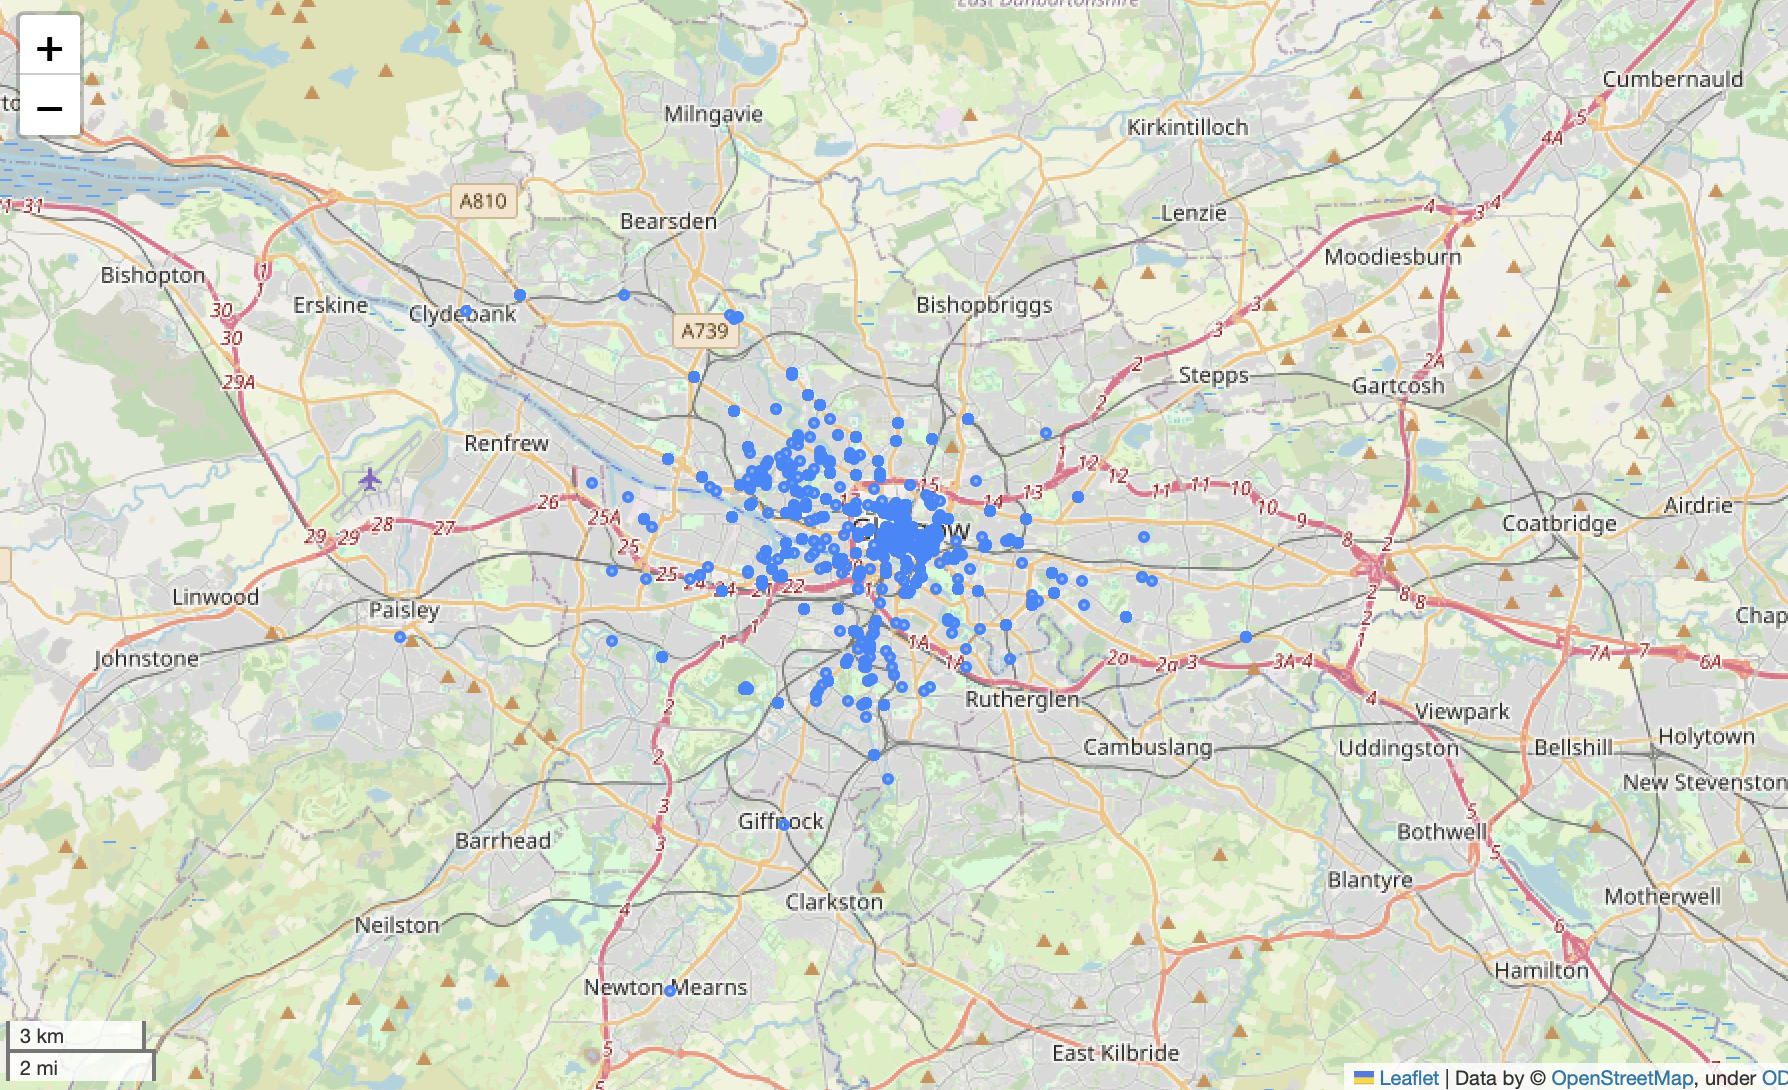

In [ ]:
# Keeping only relevant columns
keep_cols_end = [
    "endDate",
    "endPlaceId",
    "endPlaceName",
    "durationSeconds",
    "isInvalid",
    "price",
    "isEbike",
    "endPlaceLat",
    "endPlaceLong",
    "geometry",
]

gdf_bikes_end = gdf_bikes_end[keep_cols_end]
gdf_bikes_end.head()

In [14]:
# Change data types when necessary
gdf_bikes_end.endPlaceId = gdf_bikes_end.endPlaceId.astype(int)
gdf_bikes_end.endPlaceName = gdf_bikes_end.endPlaceName.astype(str)
gdf_bikes_end['endDate'] = pd.to_datetime(gdf_bikes_end['endDate'], format='%Y-%m-%dT%H:%M:%SZ')

In [17]:
from sklearn.cluster import KMeans
num_clusters = 4

kmeans_collection = KMeans(n_clusters=num_clusters, random_state=42)
gdf_bikes_end['kmeans_cluster'] = kmeans_collection.fit_predict(gdf_bikes_end[['endPlaceLong', 'endPlaceLat']])

In [18]:
#Map
import leafmap

m = leafmap.Map(center=(55.860166, -4.257505),
                zoom=12,
                draw_control=False,
                measure_control=False,
                fullscreen_control=False,
                attribution_control=True,
                   
               )

m.add_basemap("CartoDB.Positron")
m.add_data(
    gdf_bikes_end,
    column='kmeans_cluster',
    legend_title='Clusters',
    cmap='Set1',
    k=4,
)

#Ploting the map
m

Map(center=[55.860166, -4.257505], controls=(AttributionControl(options=['position', 'prefix'], position='bott…

### Part 2

1. Using the Glasglow Open Data API ( Transit) https://developer.glasgow.gov.uk/api-details#api=traffic&operation=traffic-sensor-locations fetch all the sensor locations in the city.
2. Map the sensor
3. Find the WorkingZones and Calculate/Map the areas with more and fewer sensors distributed in the city.
4. You will need:
   * Get two separate Geopandas DataFrames, one for the traffic sensors and another one for the WorkingZones.
   * Using `sJoin` ( Spatial Join) https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html
   calculate the overlay of sensors and polygons.
   * Using group_by https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html to count the number of sensors per WorkingZone
   * Make sure you add the counts into the WorkingZone polygons of Glasgow so you can create a map of Zones with more and fewer traffic sensors.
   * Of course, you will need extra steps where you manipulate the data and extract what you need, for instance, clipping the Working Zones only for Glasgow.
5. Make sure you comment on your code and describe how you are manipulating the data.


In [6]:
#Getting data- need to import requests, pandas and geopandas for the following part
import requests
import pandas as pd
import geopandas as gp

#Uploading the data from api.glasgow to get the sensor data 
traffic_sensor = "https://api.glasgow.gov.uk/traffic/v1/movement/sites?Lon=longitude&Lat=latitude"
#To know that the data has been successfully fetched, the reponse should be 200
responses = requests.get(traffic_sensor)
responses

<Response [200]>

In [9]:
#Covert data into json formt
data = responses.json()

#The json format was odd and didn't match the example in the lab notebook. This data was not flatterned and so I researched how do it.
#I found instructions on how to manipulate the structure so it can be formatted in a way which I could use to create a proper geometry.
#The instructions were provided by Chen, 2021, on Medium.
#Reference: Chen, B. (2021) All Pandas json_normalize() you should know for flattening JSON. Avaliable at https://towardsdatascience.com/all-pandas-json-normalize-you-should-know-for-flattening-json-13eae1dfb7dd (Accessed: 9 February 2024).
#sensors_df = pd.json_normalize(data2) #make sure to change

#Checking if the data is structured correctly and what columns are avaliable for use
data

#As can be seen this data is not flatterened, and therefore we cannot use the lattitude and longitude in its current state
#Therefore, we must manipulate the structure so that we can create a dataframe

[{'siteId': 'GH020A_B',
  'from': {'description': 'Gallowgate west to Sword St',
   'lat': '55.8543754827825',
   'long': '-4.217259197086495'},
  'to': {'description': 'Gallowgate west to Sword St',
   'lat': '55.854434529999814',
   'long': '-4.216974959509279'}},
 {'siteId': 'GJ3301_D',
  'from': {'description': 'Carmunnock Rd southbound',
   'lat': '55.821736212748405',
   'long': '-4.2561270616272875'},
  'to': {'description': 'Carmunnock Rd southbound',
   'lat': '55.82105417976632',
   'long': '-4.25607160697339'}},
 {'siteId': 'GH020A_A',
  'from': {'description': 'Gallowgate east to Sword St',
   'lat': '55.85539015389372',
   'long': '-4.225769520669405'},
  'to': {'description': 'Gallowgate east to Sword St',
   'lat': '55.85526881737797',
   'long': '-4.2260182328994995'}},
 {'siteId': 'GJ3301_C',
  'from': {'description': 'Carmunnock Rd northbound to Kings Park Avenue',
   'lat': '55.81925458152306',
   'long': '-4.255696036412074'},
  'to': {'description': 'Carmunnock Rd 

In [11]:
sensors_flat = [{
    'siteId': entry['siteId'],
    'from_description': entry['from']['description'],
    'from_lat': entry['from']['lat'],
    'from_long': entry['from']['long'],
    'to_description': entry['to']['description'],
    'to_lat': entry['to']['lat'],
    'to_long': entry['to']['long']
} for entry in data]

sensors_df = pd.DataFrame(sensors_flat)

In [12]:
#Checking the info to see the data type as we will need float for the long and lat so that
#we can create a proper geometry 
sensors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   siteId            1275 non-null   object
 1   from_description  1275 non-null   object
 2   from_lat          1275 non-null   object
 3   from_long         1275 non-null   object
 4   to_description    1275 non-null   object
 5   to_lat            1275 non-null   object
 6   to_long           1275 non-null   object
dtypes: object(7)
memory usage: 69.9+ KB


In [13]:
#Changing the data type of lat and long for from and to, float identifies numeric data type- essential for a genmetry
sensors_df['from_lat'] =  sensors_df['from_lat'].astype(float)
sensors_df['from_long'] =  sensors_df['from_long'].astype(float)
sensors_df['to_lat'] =  sensors_df['to_lat'].astype(float)
sensors_df['to_long'] =  sensors_df['to_long'].astype(float)

In [15]:
nan_in_column_fLat = sensors_df['from_lat'].isna().any()
nan_in_column_fLong = sensors_df['from_long'].isna().any()
nan_in_column_tLat = sensors_df['to_lat'].isna().any()
nan_in_column_tLong = sensors_df['to_long'].isna().any()

print(nan_in_column_fLat, nan_in_column_fLong, nan_in_column_tLat, nan_in_column_tLong)
#As can be seen, there are no missing geometry related data values, so no further cleaning needed

False False False False


In [18]:
#Will need geopandas to be able to make a GeoDataFrame
import geopandas as gpd
#create a Geo data frame with the newly altered long and lat columns
sensors_from = gpd.GeoDataFrame(sensors_df,
                                geometry=gpd.points_from_xy(
                                    sensors_df['from_long'],
                                    sensors_df['from_lat']))
sensors_to = gpd.GeoDataFrame(sensors_df,
                                geometry=gpd.points_from_xy(
                                    sensors_df['to_long'],
                                    sensors_df['to_lat']))

#Keep relevant columns- need to do this so it's not so complicated
sensors_from = sensors_from[['siteId','geometry']]
sensors_to = sensors_to[['siteId','geometry']]

#Checking to see what columns are included and whether they have the right data type
sensors_from.info()
sensors_to.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   siteId    1275 non-null   object  
 1   geometry  1275 non-null   geometry
dtypes: geometry(1), object(1)
memory usage: 20.0+ KB
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   siteId    1275 non-null   object  
 1   geometry  1275 non-null   geometry
dtypes: geometry(1), object(1)
memory usage: 20.0+ KB


In [19]:
#Loading Workplacezones2011 shape file
workingzones = gpd.read_file("data/data/WorkplaceZones2011Scotland.shp")
workingzones.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [23]:
#Will need to change their crs be to the same so they could be mapped on the same map
sensors_from = sensors_from.set_crs("EPSG:4326")
sensors_to = sensors_from.set_crs("EPSG:4326")
workingzones1 = workingzones.to_crs("EPSG:4326")

In [24]:
#Getting working zones for Glasgow. The LADCD code for Glasgow is S12000046. This code cuts out all other LADCD regions.
workingzones_glasgow = workingzones1[workingzones1['LADCD'] == 'S12000046']
workingzones_glasgow.explore()

<Axes: >

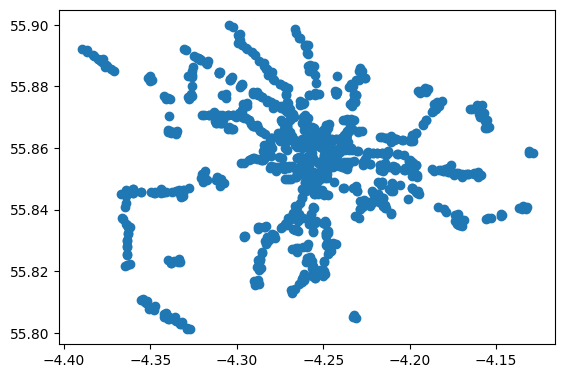

In [39]:
#Joining sensors_from and workingzones1. This is to ensure that only the points in Glasgow are included in the data.
glasgow_sjoin = gpd.sjoin(sensors_from, workingzones1, how='inner') # point in polygon
#Plotting the points to how they look 
glasgow_sjoin.plot()

#Here I have plotted all points in Glasgow

In [40]:
#Grouping to get the number of sensors per area
#This code below groups and calculates how many sensors are within each working zone. This will be used 
#To create a new data frame so that 
grouped_sensors = glasgow_sjoin.groupby('WZCD').size().reset_index(name='Num_Sensors')

#printing the grouped sensors to see if the above code was done correctly
print(grouped_sensors)

          WZCD  Num_Sensors
0    S34000363            1
1    S34000365            1
2    S34000367            5
3    S34000368            2
4    S34000370            5
..         ...          ...
335  S34005364            7
336  S34005369           15
337  S34005370            1
338  S34005371            4
339  S34005372            1

[340 rows x 2 columns]


In [46]:
#Merge with the working zones visualise result
workingzones_glasgow_sensors = workingzones_glasgow[['WZCD','geometry']].merge(grouped_sensors, on='WZCD', how='left')

#Converting the na values to 0 as the map below was having a few issues. My assumption is that areas which are NA have no value, so they have no sensors. Thus, I changed them to 0 so it can be mapped nicer. 
workingzones_glasgow_sensors['Num_Sensors'] = workingzones_glasgow_sensors['Num_Sensors'].fillna(0)

In [47]:
#Exploring glasgows zone sensors
workingzones_glasgow_sensors.explore(column='Num_Sensors',cmap='Greens')

Interactive map analysis:
The map shown above shows that sensors_from are generally found more around the middle of the city. Most do not have sensors, but S34004992 has 25, which is the highest.

Text(0.5, 1.0, 'Number of Sensors in Glasgow Working Zones')

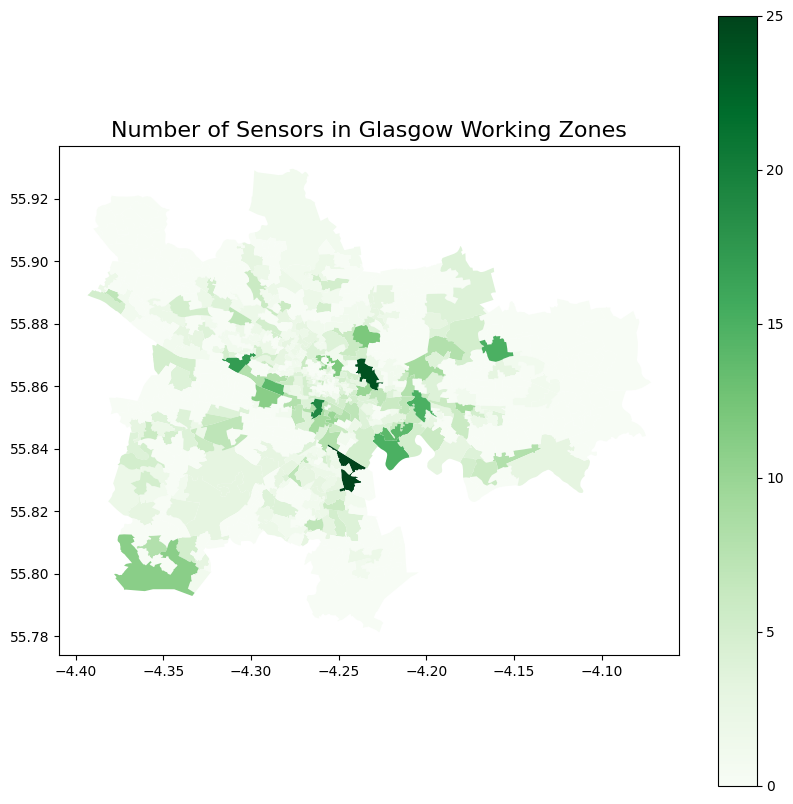

In [66]:
#Creating a simple map of what is shown above with a legend and title. 
glasgowsensormap = workingzones_glasgow_sensors.plot(column='Num_Sensors', cmap='Greens', figsize=(10, 10), legend=True, facecolor='black')
glasgowsensormap.set_title('Number of Sensors in Glasgow Working Zones', fontsize=16, color='black')


## Reading a WMS Service

In [ ]:
m = leafmap.Map(
    center=(56.329031,-3.798943),
    zoom=7
)
wms_url = 'https://maps.gov.scot/server/services/NRS/Census2011/MapServer/WMSServer?'
# A WMS URL include multiple layers, so you need to provide the name you need to load in your map.
# See this: https://www.spatialdata.gov.scot/geonetwork/srv/eng/catalog.search#/metadata/ff882746-e913-4f78-862e-f6e3974fb80e


m.add_wms_layer(url=wms_url, layers='WorkplaceZones2011', name='Census2011', shown=True)
m